### In this notebook I'm trying to detect faces using OpenCV library
[Repository on Github](https://github.com/Olks/face_detection)
<br>
<br>
I have two photos:
##### - when faces are fully visible
##### - when mouths are covered
Let's check what results we can get!

- [About OpenCV](https://docs.opencv.org/3.2.0/index.html)
- [OpenCV documentation](https://docs.opencv.org/2.4/index.html)

In [1]:
%matplotlib inline

import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt

[OpenCV architectures](https://github.com/opencv/opencv/tree/master/data/haarcascades)

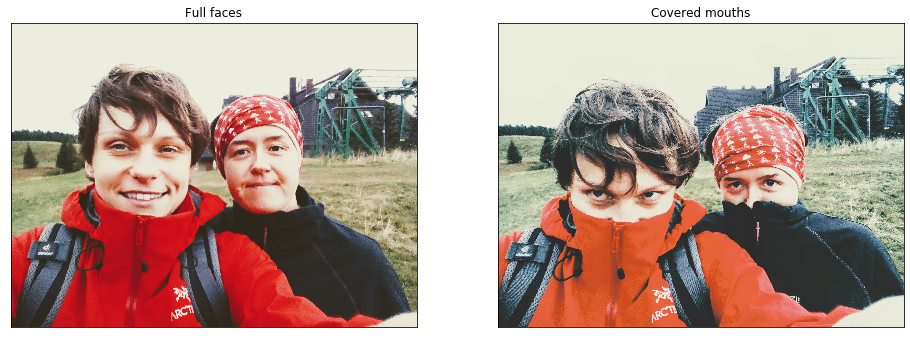

In [2]:
# Loading two pictures
image_full_faces = cv2.imread('images/full_faces_2.jpg')
image_covered_mouths = cv2.imread('images/covered_mouths_2.jpg')


# Converting colors
image_full_faces = cv2.cvtColor(image_full_faces, cv2.COLOR_BGR2RGB)
image_covered_mouths = cv2.cvtColor(image_covered_mouths, cv2.COLOR_BGR2RGB)


# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(image_full_faces);
ax[1].imshow(image_covered_mouths);
ax[0].set_title('Full faces')
ax[1].set_title('Covered mouths')
ax[0].set_xticks([]);
ax[1].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_yticks([]);

#### Detect us!

Faces detected in 'full_faceces' picture: 3
Faces detected in 'covered_mouths' picture: 0


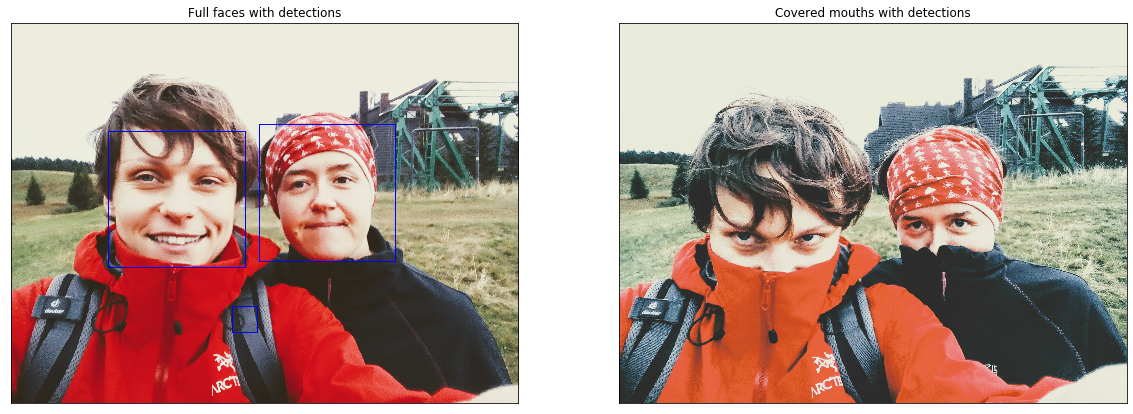

In [3]:
# Converting to grayscale
gray_full_faces = cv2.cvtColor(image_full_faces, cv2.COLOR_RGB2GRAY)
gray_covered_mouths = cv2.cvtColor(image_covered_mouths, cv2.COLOR_RGB2GRAY)

# Get pretrained architecture
face_cascade = cv2.CascadeClassifier('opencv_architectures/haarcascade_frontalface_default.xml')  

# Detect!
# scaleFactor - face size
# minNeighbors - the higher value the less detections but with higher value
# minSize
faces_full_faces = face_cascade.detectMultiScale(gray_full_faces, scaleFactor=1.75, minNeighbors=1, minSize=(100,100))
faces_covered_mouths = face_cascade.detectMultiScale(gray_covered_mouths, scaleFactor=1.75, minNeighbors=1, minSize=(100,100))

print('Faces detected in \'full_faceces\' picture:', len(faces_full_faces))
print('Faces detected in \'covered_mouths\' picture:', len(faces_covered_mouths))

# Copy images to draw squares 
image_full_faces_with_detections = np.copy(image_full_faces)
image_covered_mouths_with_detections = np.copy(image_covered_mouths)

# Draw blue box around found faces
for (x,y,w,h) in faces_full_faces:
    cv2.rectangle(image_full_faces_with_detections, (x,y), (x+w,y+h), (0,0,255), 3)
    
for (x,y,w,h) in faces_covered_mouths:
    cv2.rectangle(image_covered_mouths_with_detections, (x,y), (x+w,y+h), (0,0,255), 3)


# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(image_full_faces_with_detections);
ax[1].imshow(image_covered_mouths_with_detections);
ax[0].set_title('Full faces with detections')
ax[1].set_title('Covered mouths with detections')
ax[0].set_xticks([]);
ax[1].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_yticks([]);

#### Face detector doesn't detect faces with covered mouths. We can try out eye detector though!

Eyes detected in 'full_faceces' picture: 5
Eyes detected in 'covered_mouths' picture: 2


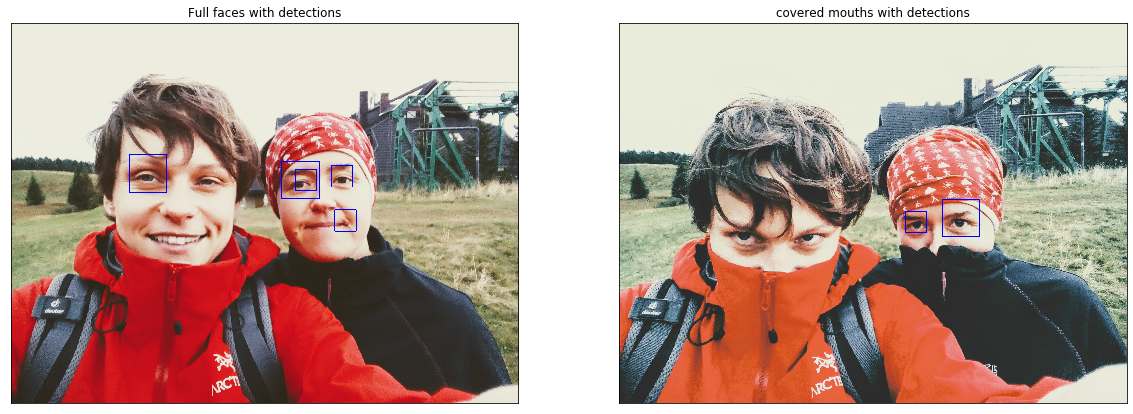

In [13]:
cascade_eye = cv2.CascadeClassifier('opencv_architectures/haarcascade_eye.xml')
cascade_right_eye = cv2.CascadeClassifier('opencv_architectures/haarcascade_righteye_2splits.xml')


eyes_full_faces = cascade_right_eye.detectMultiScale(gray_full_faces, scaleFactor=1.75, minNeighbors=2, 
                                               minSize=(80,80), maxSize=(600,600))
eyes_covered_mouths = cascade_right_eye.detectMultiScale(gray_covered_mouths, scaleFactor=1.75, minNeighbors=2, 
                                                  minSize=(80,80), maxSize=(600,600))


# Copy images to draw squares
image_full_faces_with_detections_eyes = np.copy(image_full_faces)
image_covered_mouths_with_detections_eyes = np.copy(image_covered_mouths)

# Draw blue box around found faces
for (x,y,w,h) in eyes_full_faces:
    cv2.rectangle(image_full_faces_with_detections_eyes, (x,y), (x+w,y+h), (0,0,255), 3)
    
for (x,y,w,h) in eyes_covered_mouths:
    cv2.rectangle(image_covered_mouths_with_detections_eyes, (x,y), (x+w,y+h), (0,0,255), 3)


print('Eyes detected in \'full_faceces\' picture:', len(eyes_full_faces))
print('Eyes detected in \'covered_mouths\' picture:', len(eyes_covered_mouths))
    
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(image_full_faces_with_detections_eyes);
ax[1].imshow(image_covered_mouths_with_detections_eyes);
ax[0].set_title('Full faces with detections')
ax[1].set_title('covered mouths with detections')
ax[0].set_xticks([]);
ax[1].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_yticks([]);

#### Still not perfect - let's try denoising the image before detecting the eye

Eyes detected in 'denoised_full_faceces' picture: 5
Eyes detected in 'denoised_covered_mouths' picture: 2


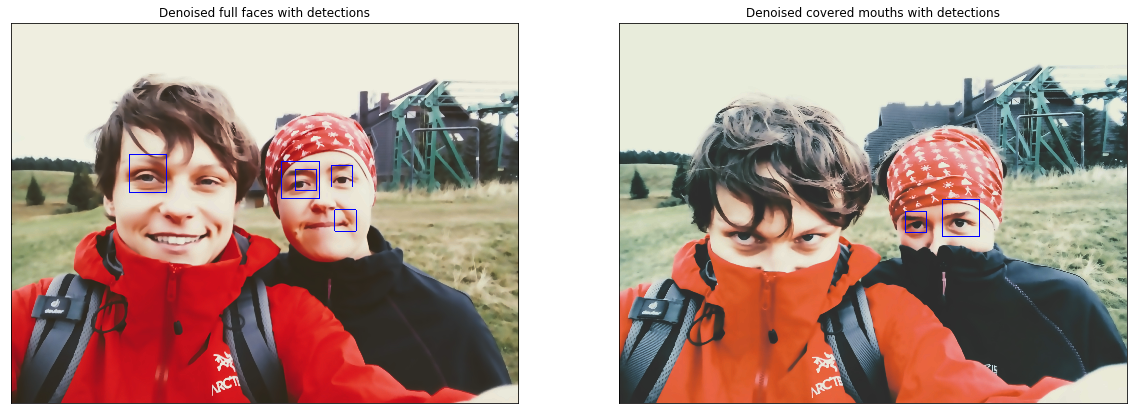

In [14]:
denoised_image_full_faces = np.copy(image_full_faces)
denoised_image_covered_mouths = np.copy(image_covered_mouths)

# Parameters:
# h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
# hForColorComponents : same as h, but for color images only. (normally same as h)
# templateWindowSize : should be odd. (recommended 7)
# searchWindowSize : should be odd. (recommended 21)

denoised_image_full_faces = cv2.fastNlMeansDenoisingColored(denoised_image_full_faces, None, 16, 10, 7,21) 
denoised_image_covered_mouths = cv2.fastNlMeansDenoisingColored(denoised_image_covered_mouths, None, 16, 10, 7,21) 

# Converting to grayscale
gray_denoised_full_faces = cv2.cvtColor(image_full_faces, cv2.COLOR_RGB2GRAY)
gray_denoised_covered_mouths = cv2.cvtColor(image_covered_mouths, cv2.COLOR_RGB2GRAY)


eyes_denoised_full_faces = cascade_right_eye.detectMultiScale(gray_denoised_full_faces, scaleFactor=1.75, minNeighbors=2, 
                                               minSize=(80,80), maxSize=(600,600))
eyes_denoised_covered_mouths = cascade_right_eye.detectMultiScale(gray_denoised_covered_mouths, scaleFactor=1.75, minNeighbors=2, 
                                               minSize=(80,80), maxSize=(600,600))


# Draw blue box around found faces
for (x,y,w,h) in eyes_denoised_full_faces:
    cv2.rectangle(denoised_image_full_faces, (x,y), (x+w,y+h), (0,0,255), 3)
    
for (x,y,w,h) in eyes_denoised_covered_mouths:
    cv2.rectangle(denoised_image_covered_mouths, (x,y), (x+w,y+h), (0,0,255), 3)


print('Eyes detected in \'denoised_full_faceces\' picture:', len(eyes_full_faces))
print('Eyes detected in \'denoised_covered_mouths\' picture:', len(eyes_covered_mouths))


# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(denoised_image_full_faces);
ax[1].imshow(denoised_image_covered_mouths);
ax[0].set_title('Denoised full faces with detections')
ax[1].set_title('Denoised covered mouths with detections')
ax[0].set_xticks([]);
ax[1].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_yticks([]);